SEPSIS DATA 

In [168]:
# setup
# ! pip install --upgrade scikit-learn
# ! pip install -r requirements.txt
# ! pip freeze > requirements.txt
# ! pip install bokeh
# ! pip install pandas_profiling
# ! pip install missingno
# ! pip install folium
# ! pip install ydata-profiling

# ! pip install scikit-learn 
# ! pip install tensorflow
#! pip install --upgrade pip
#! pip install joblib

In [170]:
#import libraries

import pandas as pd 
import numpy as np
import matplotlib
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from joblib import dump
import statsmodels.api as sm
import plotly.express as px
from bokeh.plotting import figure, show
from ydata_profiling import ProfileReport
import missingno as msno
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os,pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [131]:
# import dataset 

data1=pd.read_csv('Paitients_Files_Test.csv')
data= pd.read_csv('Paitients_Files_Train.csv')

### Exploratory Data Analysis

In [132]:
#Check the first 5 rows of the dataset

data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [133]:
# check the number  of rows and columns in the dataset

data.shape


(599, 11)

The train dataset has 11 columns and 599 rows.

In [134]:
# Get statistical summary of the dataset

data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [135]:
# Check the basic info of the Train dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [136]:
# Check the Test Dataset
data1.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [137]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


The test dataset has 11 columns and 598 rows

### Metadata of the Sepsis Dataset

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card 

### Data Cleaning


In [138]:
# create a function to check for duplicate values or entries

def check_duplicate_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

# Print duplicate rows in train data
check_duplicate_rows(data)

# Check duplicate rows in test data 
check_duplicate_rows(data1)

Number of duplicate rows: 0
Number of duplicate rows: 0


There are no duplicated values in the two dataset

In [139]:
# check for missing values

def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Mising values:\n", missing_values)

# Check missing values in train data
check_missing_values(data)

# Check missing values in the test data
check_missing_values(data1)

Mising values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64
Mising values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


 ### Univariate Analysis

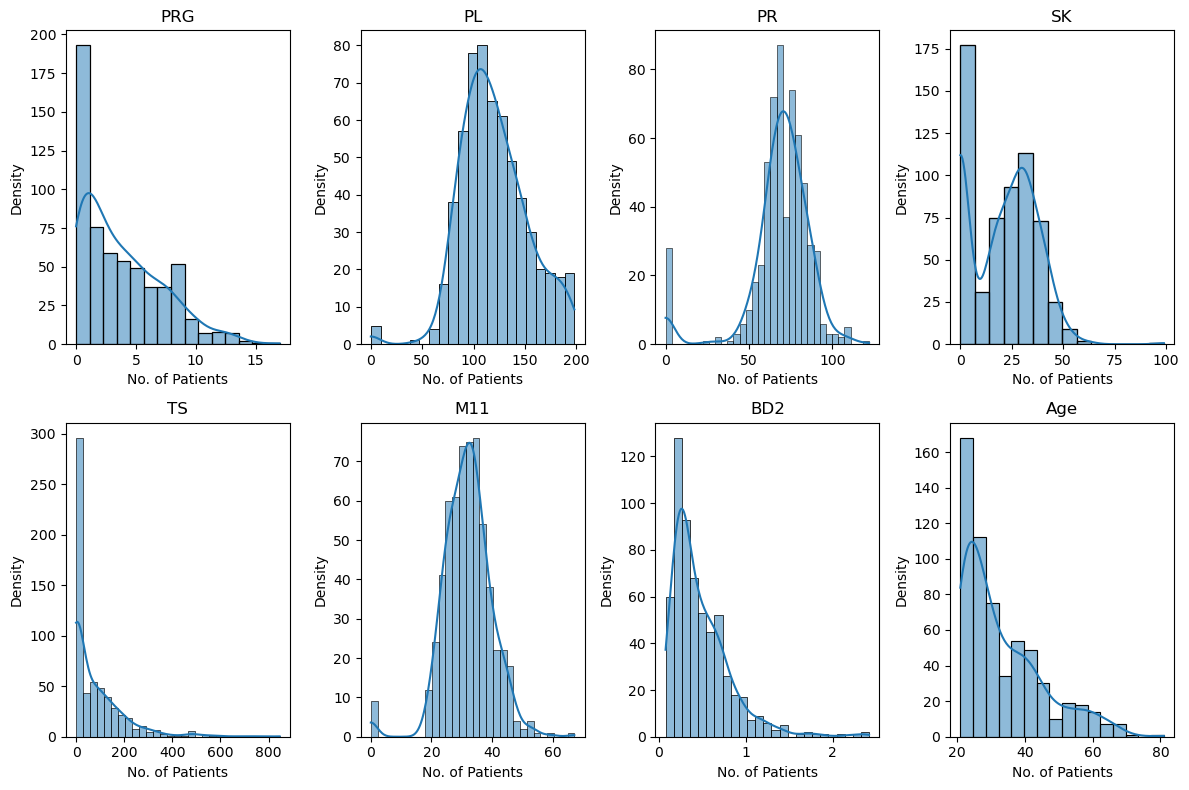

In [140]:

# Lets Analyse the relationships between the numerical variables

numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Set up the figure and subplots
plt.figure(figsize=(12, 8))

# Create histograms or density plots
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns of plots
    sns.histplot(data[var], kde=True)  # Use kde=True for density plot
    plt.title(var)
    plt.xlabel('No. of Patients')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


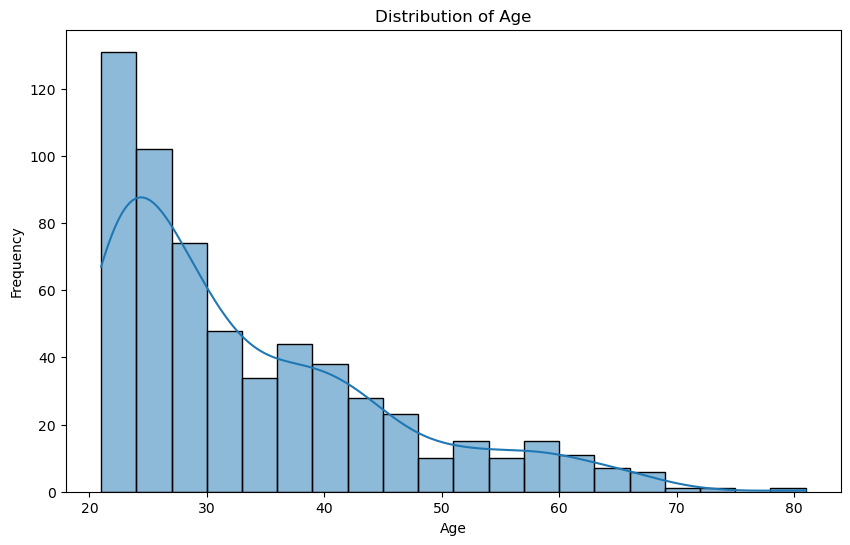

In [141]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()





### Bivariate Analysis

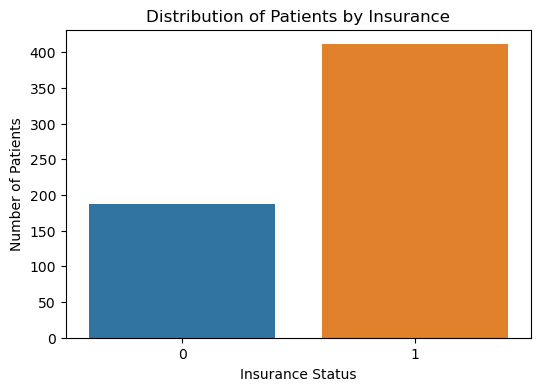

In [142]:
# Lets plot the categorical variable 'Insurance'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Insurance')
plt.title('Distribution of Patients by Insurance')
plt.xlabel('Insurance Status')
plt.ylabel('Number of Patients')
plt.show()


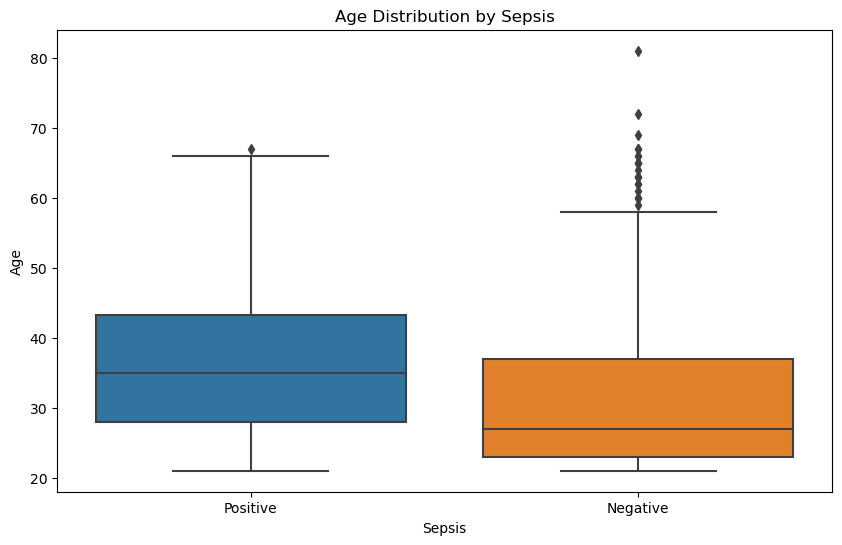

In [143]:
# Box plot of Age by Sepsis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='Age', data=data)
plt.title('Age Distribution by Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()


### Multivariate Analysis

C:\Users\BUDGET FELI\AppData\Local\Temp\ipykernel_3904\2452400829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


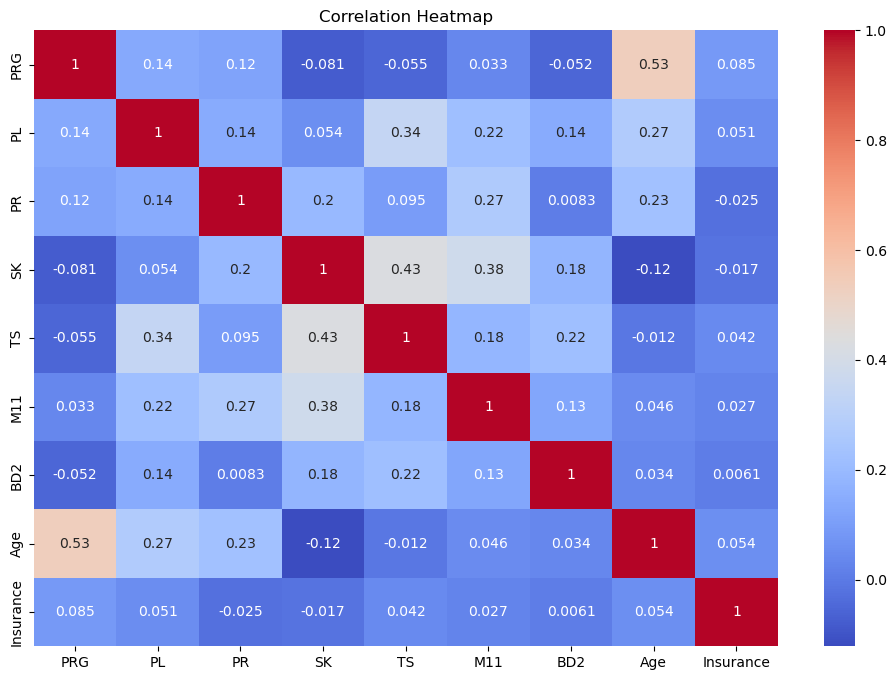

In [144]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Analysis


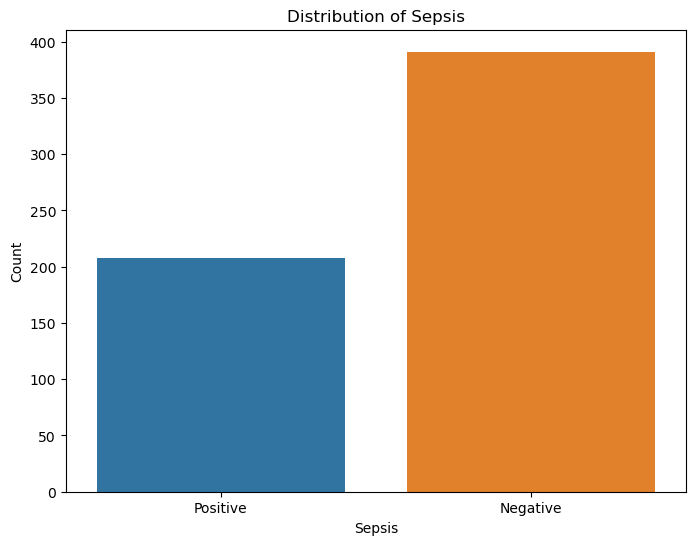

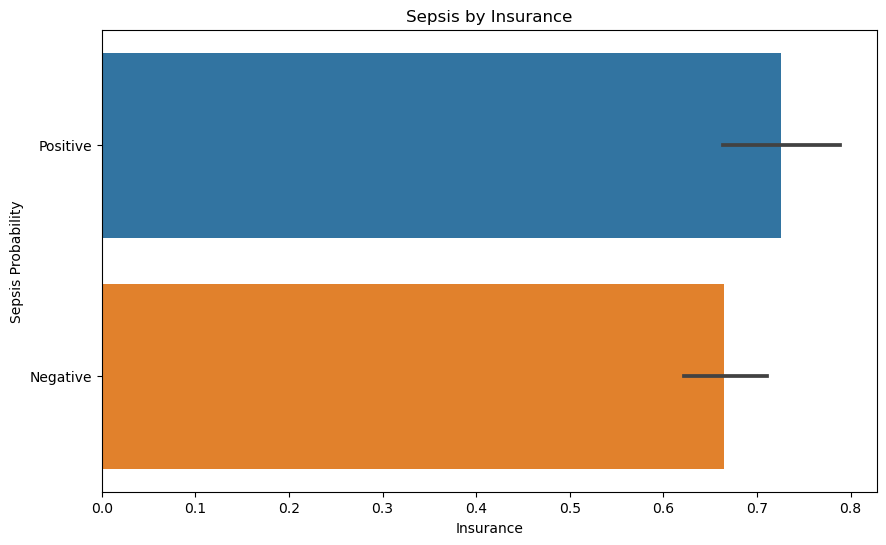

In [145]:
# Count plot of Sepsis
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepssis', data=data)
plt.title('Distribution of Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.show()

# Bar plot of Insurance by Sepsis
plt.figure(figsize=(10, 6))
sns.barplot(x='Insurance', y='Sepssis', data=data)
plt.title('Sepsis by Insurance')
plt.xlabel('Insurance')
plt.ylabel('Sepsis Probability')
plt.show()


### Feature Engineering

In [146]:
# # Create new features
# df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 60, float('inf')], labels=['Child', 'Adult', 'Elderly'])
# df['BMI_Category'] = pd.cut(df['M11'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
#                               labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])
# df['Blood_Pressure_Category'] = pd.cut(df['PR'], bins=[0, 90, 140, float('inf')],
#                                          labels=['Low', 'Normal', 'High'])
# df['Glucose_Normal'] = (df['PRG'] >= 70) & (df['PRG'] <= 140)
# df['PL_PR_Ratio'] = df['PL'] / df['PR']
# df['SK_TS_Ratio'] = df['SK'] / df['TS']
# df['Combined_Blood_Work_Score'] = (df['PL'] + df['PR'] + df['SK'] + df['TS']) / 4
# df['Age_BMI_Interact'] = df['Age'] * df['M11']
# df['BMI_Squared'] = df['M11'] ** 2



### Feature Encoding

In [147]:

def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

    # Combine the features and the encoded target variable
    data_encoded = pd.concat([data.iloc[:, :-1], target_encoded], axis=1)
    data_encoded.drop('ID', axis=1, inplace=True)

    return data_encoded

# Encode target variable in train data
train_encoded = encode_target_variable(data, 'Sepssis')

In [148]:
train_encoded.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


### Impute Missing Values

In [149]:
# # Creating imputer variables
# numerical_imputer = SimpleImputer(strategy = "mean")

# numerical_imputer.fit(X_train)

# X_train_imputed = numerical_imputer.transform(X_train)
# X_eval_imputed = numerical_imputer.transform(X_eval)
# X_test_imputed = numerical_imputer.transform(test)

### Data Splitting

In [150]:
# create a function to split the data

def split_data(X,y, test_size, random_state =42, stratify =None):
    # split the data into train and validation sets
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state = random_state, stratify = stratify )
    
    
    return X_train , X_eval, y_train, y_eval

# Split the data into train and validation sets for both x and y

X_train, X_eval, y_train, y_eval = split_data(train_encoded.iloc[:, :-1], train_encoded.iloc[:, -1:], test_size = 0.2, random_state=42, stratify =train_encoded.iloc[:,-1:])





In [151]:
X_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
161,7,102,74,40,105,37.2,0.204,45,1
236,7,181,84,21,192,35.9,0.586,51,0
497,2,81,72,15,76,30.1,0.547,25,1
40,3,180,64,25,70,34.0,0.271,26,0
372,0,84,64,22,66,35.8,0.545,21,1


In [152]:
X_eval.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
32,3,88,58,11,54,24.8,0.267,22,1
152,9,156,86,28,155,34.3,1.189,42,1
407,0,101,62,0,0,21.9,0.336,25,1
244,2,146,76,35,194,38.2,0.329,29,1
162,0,114,80,34,285,44.2,0.167,27,1


In [153]:
y_train.head()

,Sepssis
161,0
236,1
497,0
40,0
372,0


In [154]:
y_eval.head()

,Sepssis
32,0
152,1
407,0
244,0
162,0


### Feature Scaling

Feature scaling is an essential step in preparing data for machine learning models. 
It involves transforming the numerical features to a common scale, ensuring that no 
particular feature dominates the learning process due to its larger values. In the code snippet below, 
the StandardScaler from scikit-learn is used for feature scaling.

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)


In [156]:
X_train_scaled

array([[ 0.93625929, -0.54176033,  0.29246805, ..., -0.82451148,
         0.99141289,  0.67850266],
       [ 0.93625929,  1.92345764,  0.81248363, ...,  0.26023382,
         1.50461906, -1.47383358],
       [-0.56363435, -1.19707144,  0.18846493, ...,  0.14948758,
        -0.71927434,  0.67850266],
       ...,
       [ 1.53621675,  0.08234549, -0.64355999, ...,  1.75956765,
        -0.03499945,  0.67850266],
       [ 0.0363231 ,  0.76886188, -0.53955687, ..., -0.58882075,
         0.307138  ,  0.67850266],
       [-0.56363435,  0.23837194, -0.53955687, ...,  3.13963628,
        -0.71927434,  0.67850266]])

### Building a Machine Learning Model Using The Sepsis Data

In [157]:
# # Logostic Regression


# logreg_model = LogisticRegression(random_state=42)
# logreg_model.fit(X_train_scaled, y_train)
# logreg_preds = logreg_model.predict(X_eval_scaled)

# accuracy = accuracy_score(y_eval, logreg_preds)
# precision = precision_score(y_eval, logreg_preds)
# recall = recall_score(y_eval, logreg_preds)
# f1 = f1_score(y_eval, logreg_preds)

# print("Logistic Regression:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)


In [158]:
#Logistic Regression

# Reshape the target variables for train and validation sets
y_train_reshaped = y_train['Sepssis'].values
y_eval_reshaped = y_eval['Sepssis'].values

logreg_model.fit(X_train_scaled, y_train_reshaped)
logreg_preds = logreg_model.predict(X_eval_scaled)


logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)  # y_train is a pandas Series
logreg_preds = logreg_model.predict(X_eval_scaled)

accuracy = accuracy_score(y_eval, logreg_preds)
precision = precision_score(y_eval, logreg_preds)
recall = recall_score(y_eval, logreg_preds)
f1 = f1_score(y_eval, logreg_preds)

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Logistic Regression:
Accuracy: 0.7416666666666667
Precision: 0.6341463414634146
Recall: 0.6190476190476191
F1-Score: 0.6265060240963854


C:\Users\BUDGET FELI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_eval_scaled)

accuracy = accuracy_score(y_eval, rf_preds)
precision = precision_score(y_eval, rf_preds)
recall = recall_score(y_eval, rf_preds)
f1 = f1_score(y_eval, rf_preds)

print("Random Forest:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


C:\Users\BUDGET FELI\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest:
Accuracy: 0.7083333333333334
Precision: 0.5853658536585366
Recall: 0.5714285714285714
F1-Score: 0.5783132530120483


In [160]:
# Gradient Boost Machines 

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)
gbm_preds = gbm_model.predict(X_eval_scaled)

accuracy = accuracy_score(y_eval, gbm_preds)
precision = precision_score(y_eval, gbm_preds)
recall = recall_score(y_eval, gbm_preds)
f1 = f1_score(y_eval, gbm_preds)

print("Gradient Boosting Machines:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


C:\Users\BUDGET FELI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Machines:
Accuracy: 0.7166666666666667
Precision: 0.6111111111111112
Recall: 0.5238095238095238
F1-Score: 0.5641025641025642


In [161]:
# Support Vector Machines
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_eval_scaled)

accuracy = accuracy_score(y_eval, svm_preds)
precision = precision_score(y_eval, svm_preds)
recall = recall_score(y_eval, svm_preds)
f1 = f1_score(y_eval, svm_preds)

print("Support Vector Machines:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Support Vector Machines:
Accuracy: 0.7
Precision: 0.5833333333333334
Recall: 0.5
F1-Score: 0.5384615384615384


C:\Users\BUDGET FELI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Neural Networks
nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(tf.keras.layers.Dense(32, activation='relu'))
nn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)
nn_preds = (nn_model.predict(X_eval_scaled) > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_eval, nn_preds)
precision = precision_score(y_eval, nn_preds)
recall = recall_score(y_eval, nn_preds)
f1 = f1_score(y_eval, nn_preds)

print("Neural Network:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Epoch 1/10
15/15 [==============================] - 3s 4ms/step - loss: 0.6868 - accuracy: 0.5407
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.6952
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7432
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7787
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7912
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4633 - accuracy: 0.7933
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.7996
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.8017
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8017
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Neural Network:
Accuracy: 0.6916666666666667
Precision:

### Model Evaluation 

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Train and evaluate models
models = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbm_model,
    "Support Vector Machine": svm_model,
    "Neural Network": nn_model
}

best_model_name = ""
best_model_accuracy = 0

for model_name, model in models.items():
    model_preds = model.predict(X_eval_scaled)
    threshold = 0.5  # Set the threshold for binary classification
    model_preds_binary = (model_preds > threshold).astype(int)
    
    accuracy = accuracy_score(y_eval, model_preds_binary)
    print(f"{model_name}: Accuracy = {accuracy:.4f}")
    
    if accuracy > best_model_accuracy:
        best_model_name = model_name
        best_model_accuracy = accuracy

print(f"Best Model: {best_model_name} with Accuracy = {best_model_accuracy:.4f}")



Logistic Regression: Accuracy = 0.7417
Random Forest: Accuracy = 0.7083
Gradient Boosting: Accuracy = 0.7167
Support Vector Machine: Accuracy = 0.7000
4/4 [==============================] - 0s 3ms/step
Neural Network: Accuracy = 0.6917
Best Model: Logistic Regression with Accuracy = 0.7417


### Save the best Model

In [169]:

best_model_name = "Logistic_Regresssion"

# Save the best model to a file
dump(best_model, best_model_name)

print(f"Best model saved as '{best_model_name}'")


Best model saved as 'Logistic_Regresssion'


### Now Lets Retrain The Train Dataset Using The Best Perfoming Model

In [174]:


# Load and preprocess your entire training data
Train = pd.read_csv('Paitients_Files_Train.csv')

# Drop Sepsis and ID since Sepsis is the target variable and ID ins not needed.
X = Train.drop(columns=['Sepssis', 'ID'])  # Assuming 'Sepssis' is the target variable
y = Train['Sepssis']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the best model (Logistic Regression) on the entire training dataset
best_model = LogisticRegression(random_state=42)  
best_model.fit(X_scaled, y)

# Save the retrained best model to a file
best_model_name = "logreg_model.joblib"
dump(best_model, best_model_name)

print(f"Retrained best model (Logistic Regression) saved as '{best_model_name}'")


Retrained best model (Logistic Regression) saved as 'logreg_model.joblib'


### Let's Predict On The Test Data With Our Saved Model

In [183]:
# Lets Scale the data and save it first

# Load and preprocess your training data
Train = pd.read_csv('Paitients_Files_Train.csv')  # Load your training dataset

# Assuming 'X_train' represents the features of the training set
X_train = Train.drop(columns=['Sepssis', 'ID'])  # Assuming 'Sepssis' is the target variable

# Fit the StandardScaler on the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the fitted scaler to a file
scaler_name = "fitted_scaler.joblib"
dump(scaler, scaler_name)

print(f"Fitted scaler saved as '{scaler_name}'")


Fitted scaler saved as 'fitted_scaler.joblib'


In [186]:

# Load and preprocess your test data
Test = pd.read_csv('Paitients_Files_Test.csv')  # Load your test dataset

# Assuming 'X_test' represents the features of the test set
X_test = Test.drop(columns=['ID'])  # Drop columns 'ID' and 'Insurance'

# Scale the test features using the same scaler as before
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Use 'transform' instead of 'fit_transform'

# Load the retrained best model from file
best_model_name = "logreg_model.joblib"
loaded_model = load(best_model_name)

# Predict using the loaded model
predictions = loaded_model.predict(X_test_scaled)

# 'predictions' contains the predicted labels (0 or 1) for the test set
print("Predictions:", predictions)


Predictions: ['Negative' 'Negative' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Negative' 'Positive' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Positive' 'Negative'
 'Positive' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Neg